# Quantitative Variables

In [2]:
import pandas as pd
# Load the Colombia COVID-19 data from a CSV file
df_CO = pd.read_csv('data/colombia_2020-05-28.csv')
df_CO

,Departamento,Edad,Sexo,Tipo,Ubicación,Estado,Fecha de inicio de síntomas,Fecha de muerte,Fecha de diagnóstico,Fecha recuperado
0,Bogotá D.C.,19,F,Importado,Recuperado,Leve,2020-02-27,- -,2020-03-06,2020-03-13
1,Valle del Cauca,34,M,Importado,Recuperado,Leve,2020-03-04,- -,2020-03-09,2020-03-19
2,Antioquia,50,F,Importado,Recuperado,Leve,2020-02-29,- -,2020-03-09,2020-03-15
3,Antioquia,55,M,Relacionado,Recuperado,Leve,2020-03-06,- -,2020-03-11,2020-03-26
4,Antioquia,25,M,Relacionado,Recuperado,Leve,2020-03-08,- -,2020-03-11,2020-03-23
...,...,...,...,...,...,...,...,...,...,...
25361,Buenaventura D.E.,48,M,En estudio,Hospital,Moderado,2020-05-12,- -,2020-05-28,NaN
25362,Valle del Cauca,55,F,En estudio,Casa,Leve,2020-05-21,/ /,2020-05-28,NaN
25363,Buenaventura D.E.,39,F,En estudio,Casa,Leve,2020-05-23,/ /,2020-05-28,NaN
25364,Valle del Cauca,13,F,En estudio,Casa,Leve,2020-05-13,/ /,2020-05-28,NaN


## Visualizing One Quantitative Variable

quantitative variable -> (bining) -> categorical variable -> make a "bar plot"

<Axes: title={'center': 'COVID-19 Cases by Age Group in Colombia'}, xlabel='age'>

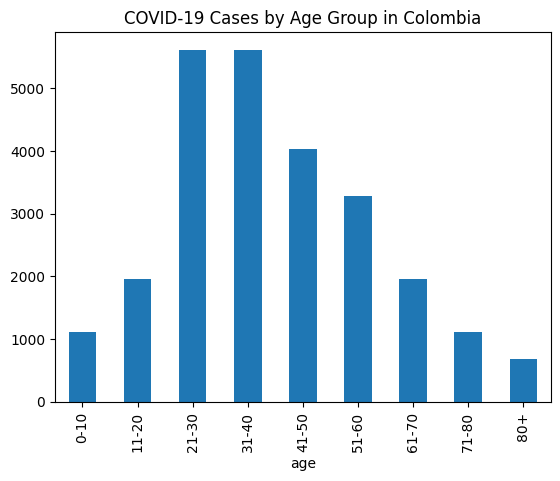

In [8]:
df_CO['age'] = pd.cut(
    df_CO['Edad'],
    bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 120],
    labels=['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '80+'],
    right=False
)
df_CO['age'].value_counts(sort=False).plot(kind='bar', title='COVID-19 Cases by Age Group in Colombia')

## Histograms

Pandas provides a built-in method for constructinc histograms:
`Series.plot.hist()`

Comparison between 
- There are no spaces between the bars.
- The x-axis is just numbers, rather than bins.

<Axes: ylabel='Frequency'>

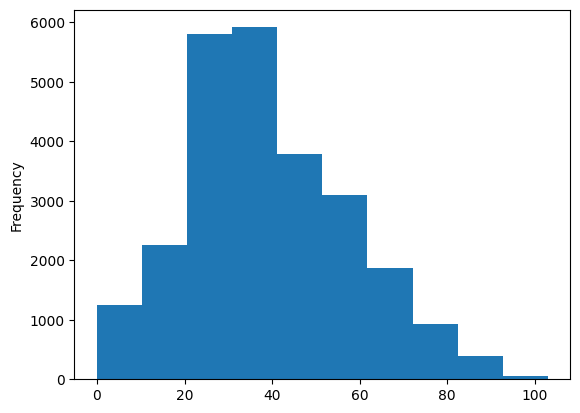

In [9]:
df_CO['Edad'].plot.hist()

## Distributions

 The **distribution** of a quantitative variable is similar. The counts
 are scaled so that the total area is 1.0 (or 100%).

<Axes: ylabel='Frequency'>

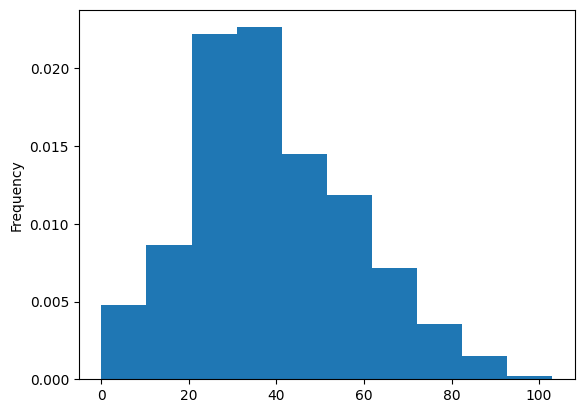

In [10]:
df_CO['Edad'].plot.hist(density=True)

## Summarizing a Quantitative 

- If you had to summarize this data using a single number, what
 number would you pick?
    1. Center
    2. Spread

## Summaries of Center: Mean

To calculate the mean of a quantitative variable $\mathrm{x}$ with values $x_1, x_2, x_3, \dotsc, x_n,$ we use the fomula:

$$
\mathrm{\bar{x}} = \mathrm{mean(x)} = \frac{\sum_{i=1}^n x_i}{n}
$$

**Caution:** It is not at all obvious that this fomula should give a summary of center! 

In [ ]:
# Calculate the mean age manually
df_CO['Edad'].sum() / len(df_CO)

# or use the built-in method
df_CO['Edad'].mean()

np.float64(39.04742568792872)

In [ ]:
# The mean is the value c that minimizes the sum of squared distances to the observations.

((df_CO['Edad'] - 23) ** 2).sum()

np.int64(15361477)

In [16]:
c = 50
((df_CO["Edad"] - c) ** 2).sum()

np.int64(11872105)

<Axes: title={'center': 'Sum of Squared Distances vs. c'}>

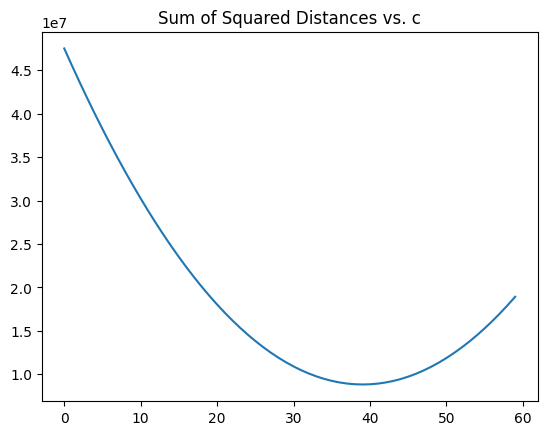

In [ ]:
cs = range(0, 60)
sum_squared_distances = []

for c in cs: 
    sum_squared_distances.append(((df_CO['Edad'] - c) ** 2).sum())

# What is the minimum value of the sum of squared distances?
pd.Series(sum_squared_distances, index=cs).plot.line(title='Sum of Squared Distances vs. c')

## Summaries of Center: Median

- the "middle" of the *sorted* values

- To calculate the mean of a quantitative variable $\mathrm{x}$ with values $x_1, x_2, x_3, ..., x_n,$ we do the following steps: 

1. Sort the values from smallest to largest: (sorted value = **order statistics**)

$$
x_(1), x_(2), x_(3), \dotsc, x_(n)\cdot
$$

2. The "middle" value depends on whether we have an odd or an even number of observations.
   - If $n$ is odd, middle value = $x_{(\frac{n+1}{2})}$
   - If $n$ is even, middle values = $x_{(\frac{n}{2})}$ and $x_{(\frac{n}{2}+1)}$



In [ ]:
# calculate median manually
# code generated by Microsoft Copilot

def calculate_median(series: pd.Series) -> float:
    # 1. 데이터를 정렬합니다.
    sorted_series = sorted(series)
    
    # 2. 데이터 길이를 구합니다.
    length = len(sorted_series)
    
    # 3. 길이가 짝수인지 홀수인지에 따라 다르게 처리합니다.
    if length % 2 == 0:
        # 짝수인 경우: 중앙에 있는 두 값의 평균을 계산
        middle_left = sorted_series[length // 2 - 1]
        middle_right = sorted_series[length // 2]
        median = (middle_left + middle_right) / 2
    else:
        # 홀수인 경우: 중앙 값 그대로 반환
        median = sorted_series[length // 2]
    
    return median

calculate_median(df_CO['Edad'])

37.0

In [4]:
# calculate median using built-in method
df_CO['Edad'].median()

np.float64(37.0)

In [5]:
df_CO_age_mean = df_CO['Edad'].mean()
df_CO_age_median = df_CO['Edad'].median()
# Compare the mean and median
df_CO_age_mean, df_CO_age_median

(np.float64(39.04742568792872), np.float64(37.0))

## Summaries of Spread: Variance

The variance of a variable $\mathrm{x}$ whose values are $x_1, x_2, x_3, \dotsc, x_n$ is calculated using the fomula

$$
\mathrm{var(x)} = \frac{\sum_{i=1}^n (x_i - \mathrm{\bar{x}})^2}{n - 1}
$$

단, 이럴 경우 제곱이 되어버림...

In [ ]:
# implementing the variance fomula manually
(((df_CO['Edad'] - df_CO['Edad'].mean()) ** 2).sum() / (len(df_CO) - 1))

np.float64(348.0870469898451)

In [7]:
# or use the built-in method
df_CO['Edad'].var()

np.float64(348.0870469898451)

## Summaries of Spread: Standard Deviation

To fix the units, we take the square root to get the **standard deviation:**

$$
\mathrm{sd(x) = \sqrt{var(x)}}
$$

In [8]:
# calculate standard deviation using the Series.std() method
df_CO['Edad'].std()

np.float64(18.65709106452142)